# Download and Explore NYC Geographical coordinates.

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import folium
import csv
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.ticker as ticker
import seaborn as sns

In [6]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [7]:
neighborhoods_data = newyork_data['features']

In [8]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [9]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
neighborhoods = pd.DataFrame(columns=column_names)

In [10]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [11]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [12]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(neighborhoods['Borough'].unique()),neighborhoods.shape[0]))

The dataframe has 5 boroughs and 306 neighborhoods.


In [14]:
neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)

In [15]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [16]:
map_NewYork = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)  
    
map_NewYork

# Web scrapping of Population and Demographics data of NYC from Wikipedia

## A. Population Data

In [63]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})
headers = [header.text for header in table.find_all('th')]
table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('BON2_POPULATION1.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

In [64]:
Pop_data=pd.read_csv('BON2_POPULATION1.csv')
Pop_data.drop(Pop_data.columns[[4,5,10,11,12,13,14]], axis=1,inplace=True)
Pop_data
Pop_data.drop(Pop_data.columns[[7]], axis=1,inplace=True)
Pop_data

,New York City's five boroughsvte\r\n,Jurisdiction\r\n,Population\r\n,Gross Domestic Product\r\n,Borough,County,Estimate (2019)[12]
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,109.04\r\n,"33,867\r\n","13,006\r\n"
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,183.42\r\n,"36,147\r\n","13,957\r\n"
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,59.13\r\n,"71,341\r\n","27,544\r\n"
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,281.09\r\n,"20,767\r\n","8,018\r\n"
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,151.18\r\n,"8,157\r\n","3,150\r\n"
5,City of New York,"8,336,817",842.343,"101,000","27,547","10,636\r\n",NaN
6,State of New York,"19,453,561","1,731.910","89,000",412,159\r\n,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
Pop_data.columns = Pop_data.columns.str.replace(' ', '')
Pop_data.columns = Pop_data.columns.str.replace('\'','')
Pop_data

,NewYorkCitysfiveboroughsvte\r\n,Jurisdiction\r\n,Population\r\n,GrossDomesticProduct\r\n,Borough,County,Estimate(2019)[12]
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,109.04\r\n,"33,867\r\n","13,006\r\n"
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,183.42\r\n,"36,147\r\n","13,957\r\n"
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,59.13\r\n,"71,341\r\n","27,544\r\n"
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,281.09\r\n,"20,767\r\n","8,018\r\n"
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,151.18\r\n,"8,157\r\n","3,150\r\n"
5,City of New York,"8,336,817",842.343,"101,000","27,547","10,636\r\n",NaN
6,State of New York,"19,453,561","1,731.910","89,000",412,159\r\n,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
Pop_data.rename(columns = {'NewYorkCitysfiveboroughsvte\r\n' : 'Borough',
                   'Jurisdiction\r\n':'County',
                   'Population\r\n':'Estimate_2019', 
                   'GrossDomesticProduct\r\n':'square_miles',
                    'Borough':'square_km',
                    'County':'persons_sq_mi',
                    'Estimate(2019)[12]':'persons_sq_km'}, inplace=True)
Pop_data

,Borough,County,Estimate_2019,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx\r\n,\r\n Bronx\r\n,"1,418,207\r\n",42.695\r\n,109.04\r\n,"33,867\r\n","13,006\r\n"
1,Brooklyn\r\n,\r\n Kings\r\n,"2,559,903\r\n",91.559\r\n,183.42\r\n,"36,147\r\n","13,957\r\n"
2,Manhattan\r\n,\r\n New York\r\n,"1,628,706\r\n",600.244\r\n,59.13\r\n,"71,341\r\n","27,544\r\n"
3,Queens\r\n,\r\n Queens\r\n,"2,253,858\r\n",93.310\r\n,281.09\r\n,"20,767\r\n","8,018\r\n"
4,Staten Island\r\n,\r\n Richmond\r\n,"476,143\r\n",14.514\r\n,151.18\r\n,"8,157\r\n","3,150\r\n"
5,City of New York,"8,336,817",842.343,"101,000","27,547","10,636\r\n",NaN
6,State of New York,"19,453,561","1,731.910","89,000",412,159\r\n,NaN
7,Sources:[14] and see individual borough articl...,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
Pop_data['Borough']=Pop_data['Borough'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['County']=Pop_data['County'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['Estimate_2019']=Pop_data['Estimate_2019'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['square_miles']=Pop_data['square_miles'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['square_km']=Pop_data['square_km'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['persons_sq_mi']=Pop_data['persons_sq_mi'].replace(to_replace='\r\n', value='', regex=True)
Pop_data['persons_sq_km']=Pop_data['persons_sq_km'].replace(to_replace='\r\n', value='', regex=True)
Pop_data

,Borough,County,Estimate_2019,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,151.18,"8,157","3,150"
5,City of New York,"8,336,817",842.343,"101,000","27,547","10,636",NaN
6,State of New York,"19,453,561","1,731.910","89,000",412,159,NaN
7,Sources:[14] and see individual borough articles,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
i = Pop_data[((Pop_data.Borough == 'Sources:[14] and see individual borough articles'))].index
Pop_data.drop(i)

,Borough,County,Estimate_2019,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,151.18,"8,157","3,150"
5,City of New York,"8,336,817",842.343,"101,000","27,547","10,636",NaN
6,State of New York,"19,453,561","1,731.910","89,000",412,159,NaN


In [72]:
Pop_data.loc[5:,['persons_sq_mi','persons_sq_km']] = Pop_data.loc[2:,['persons_sq_mi','persons_sq_km']].shift(1,axis=1)
Pop_data.loc[5:,['square_km','persons_sq_mi']] = Pop_data.loc[2:,['square_km','persons_sq_mi']].shift(1,axis=1)
Pop_data.loc[5:,['square_miles','square_km']] = Pop_data.loc[2:,['square_miles','square_km']].shift(1,axis=1)
Pop_data.loc[5:,['Estimate_2019','square_miles']] = Pop_data.loc[2:,['Estimate_2019','square_miles']].shift(1,axis=1)
Pop_data.loc[5:,['County','Estimate_2019']] = Pop_data.loc[2:,['County','Estimate_2019']].shift(1,axis=1)
Pop_data.loc[5:,['Borough','County']] = Pop_data.loc[2:,['Borough','County']].shift(1,axis=1)
Pop_data

,Borough,County,Estimate_2019,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,151.18,"8,157","3,150"
5,NaN,City of New York,"8,336,817",842.343,"101,000","27,547","10,636"
6,NaN,State of New York,"19,453,561","1,731.910","89,000",412,159
7,NaN,Sources:[14] and see individual borough articles,NaN,NaN,NaN,NaN,NaN


In [73]:
Pop_data = Pop_data.fillna('')
Pop_data

,Borough,County,Estimate_2019,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,151.18,"8,157","3,150"
5,,City of New York,"8,336,817",842.343,"101,000","27,547","10,636"
6,,State of New York,"19,453,561","1,731.910","89,000",412,159
7,,Sources:[14] and see individual borough articles,,,,,


In [74]:
i = Pop_data[((Pop_data.County == 'Sources:[14] and see individual borough articles'))].index
Pop_data.drop(i)

,Borough,County,Estimate_2019,square_miles,square_km,persons_sq_mi,persons_sq_km
0,The Bronx,Bronx,"1,418,207",42.695,109.04,"33,867","13,006"
1,Brooklyn,Kings,"2,559,903",91.559,183.42,"36,147","13,957"
2,Manhattan,New York,"1,628,706",600.244,59.13,"71,341","27,544"
3,Queens,Queens,"2,253,858",93.310,281.09,"20,767","8,018"
4,Staten Island,Richmond,"476,143",14.514,151.18,"8,157","3,150"
5,,City of New York,"8,336,817",842.343,"101,000","27,547","10,636"
6,,State of New York,"19,453,561","1,731.910","89,000",412,159


In [75]:
Pop_data.to_csv('BON2_POPULATION.csv',index=False)

## Download and Explore NYC and its Boroughs Cuisine dataset

In [99]:
NYC_CUISINE=pd.read_csv('BON3_NYC_CUISINE.csv', encoding='latin-1')
NYC_CUISINE.head()

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian"
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,Filipino


In [100]:
NYC_CUISINE.shape

(64, 3)

In [101]:
NYC_CUISINE['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,18
Manhattan,13
The Bronx,9
Staten Island,5


### 1. NEW YORK CITY CUISINE - WORD CLOUD

In [102]:
CUISINE_WC = NYC_CUISINE[['Cuisine']]
CUISINE_WC

,Cuisine
0,"Mexican, Puerto Rican, Dominican, Korean"
1,"Italian, Albanian"
2,"Italian, Seafood"
3,"Italian, Albanian"
4,Filipino
5,Jewish
6,"Puerto Rican, Dominican"
7,"Jamaican, West Indian"
8,Irish
9,"Greek, Italian, Eastern European, Brazilian, E..."


In [103]:
CUISINE_WC.to_csv('CUISINE_WC.txt', sep=',', index=False)

In [104]:
CUISINE_WC1 = open('CUISINE_WC.txt', 'r').read()

In [105]:
stopwords = set(STOPWORDS)

In [106]:
NYC_CUISINE_WC = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
NYC_CUISINE_WC.generate(CUISINE_WC1)

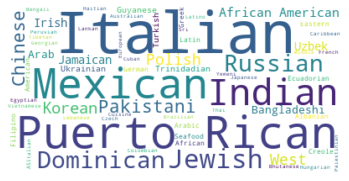

<Figure size 2160x3240 with 0 Axes>

In [107]:
plt.imshow(NYC_CUISINE_WC, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()

### 2. BROOKLYN CUISINE - WORD CLOUD

In [108]:
Brooklyn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Cuisine
0,Brooklyn,Bay Ridge,"Irish, Italian, Greek, Turkish, Lebanese, Pale..."
1,Brooklyn,Bedford-Stuyvesant,"African-American, Jamaican, Trinidadian, Puert..."
2,Brooklyn,Bensonhurst,"Italian, Chinese, Turkish, Russian, Mexican, U..."
3,Brooklyn,Borough Park,"Jewish, Italian, Mexican, Chinese"
4,Brooklyn,Brighton Beach,"Russian, Georgian, Turkish, Pakistani, Ukrainian"


In [110]:
BR_CUISINE_WC = Brooklyn_data[['Cuisine']]
BR_CUISINE_WC.to_csv('BR_CUISINE.txt', sep=',', index=False)

In [111]:
BR_CUISINE_WC = open('BR_CUISINE.txt', 'r').read()


In [112]:
stopwords = set(STOPWORDS)

In [113]:
BR_CUISINE_NYC = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
BR_CUISINE_NYC.generate(BR_CUISINE_WC)

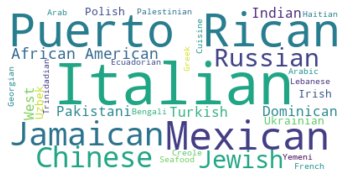

<Figure size 2160x3240 with 0 Axes>

In [114]:
plt.imshow(BR_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

### 3. QUEENS CUISINE - WORD CLOUD

In [115]:
Queens_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Queens'].reset_index(drop=True)

In [116]:
Q_CUISINE_WC = Queens_data[['Cuisine']]

In [117]:
Q_CUISINE_WC.to_csv('Q_CUISINE.txt', sep=',', index=False)

In [118]:
Q_CUISINE_WC = open('Q_CUISINE.txt', 'r').read()

In [120]:
Q_CUISINE_NYC = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
Q_CUISINE_NYC.generate(Q_CUISINE_WC)

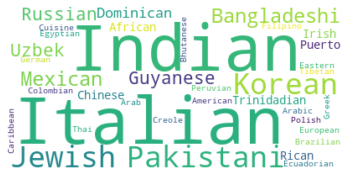

<Figure size 2160x3240 with 0 Axes>

In [121]:
plt.imshow(Q_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()

### 4. MANHATTAN CUISINE - WORD CLOUD

In [123]:
Manhattan_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Manhattan'].reset_index(drop=True)

In [124]:
MN_CUISINE_WC = Manhattan_data[['Cuisine']]

In [125]:
MN_CUISINE_WC.to_csv('MN_CUISINE.txt', sep=',', index=False)

In [126]:
MN_CUISINE_WC = open('MN_CUISINE.txt', 'r').read()

In [127]:
MN_CUISINE_NYC = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
MN_CUISINE_NYC.generate(MN_CUISINE_WC)

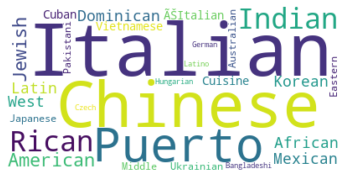

<Figure size 2160x3240 with 0 Axes>

In [128]:
plt.imshow(MN_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

### 5. THE BRONX CUISINE - WORD CLOUD

In [129]:
Bronx_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'The Bronx'].reset_index(drop=True)


In [130]:
BX_CUISINE_WC = Bronx_data[['Cuisine']]

In [131]:
BX_CUISINE_WC.to_csv('BX_CUISINE.txt', sep=',', index=False)

In [132]:
BX_CUISINE_WC = open('BX_CUISINE.txt', 'r').read()


In [133]:
BX_CUISINE_NYC = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
BX_CUISINE_NYC.generate(BX_CUISINE_WC)

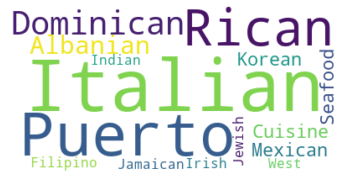

<Figure size 2160x3240 with 0 Axes>

In [134]:
plt.imshow(BX_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

### 6. STATEN ISLAND - Word cloud

In [135]:
Sttn_data = NYC_CUISINE[NYC_CUISINE['Borough'] == 'Staten Island'].reset_index(drop=True)

In [136]:
ST_CUISINE_WC = Sttn_data[['Cuisine']]

In [137]:
ST_CUISINE_WC.to_csv('ST_CUISINE.txt', sep=',', index=False)

In [138]:
ST_CUISINE_WC = open('ST_CUISINE.txt', 'r').read()

In [139]:
ST_CUISINE_NYC = WordCloud(background_color='white',max_words=2000,stopwords=stopwords)
ST_CUISINE_NYC.generate(ST_CUISINE_WC)

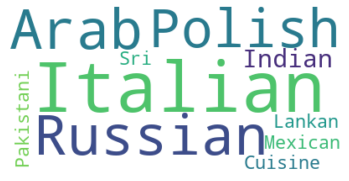

<Figure size 2160x3240 with 0 Axes>

In [140]:
plt.imshow(ST_CUISINE_NYC, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

## Download and Explore Farmers Market dataset

In [142]:
FM_NYC=pd.read_csv('DOHMH_Farmers_Markets.csv', encoding='latin-1')
FM_NYC.head()

,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


In [143]:
FM_NYC.shape

(138, 13)

In [145]:
FM_NYC_filtered=FM_NYC.copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()

(138, 13)


,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


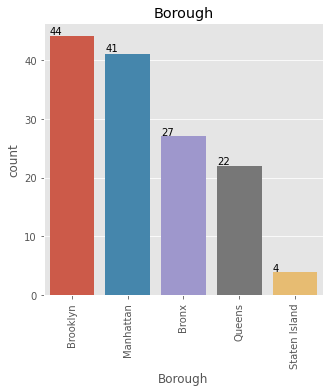

In [146]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

In [147]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [149]:
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, FacilityName, borough in zip(FM_NYC_filtered['Latitude'], FM_NYC_filtered['Longitude'], FM_NYC_filtered['Market Name'], FM_NYC_filtered['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets

In [5]:
DM_NYC=pd.read_csv('BON2_DEMOGRAPHICS.csv', encoding='latin-1')
DM_NYC.fillna(' ')
DM_NYC.head()

,Racialcomposition,2010,1990,1970,1940
0,White,44.00%,52.30%,76.60%,93.60%
1,Non-Hispanic,33.30%,43.20%,62.90%,92.00%
2,Black or African American,25.50%,28.70%,21.10%,6.10%
3,Hispanic or Latino (of any race),28.60%,24.40%,16.20%,1.60%
4,Asian,12.70%,7.00%,1.20%,NaN
